### Применение библиотек Matplotlib, Seaborn, Pandas, Scipy

### Задание 1.

Загрузите из файла *heart.csv* данные о сердечных заболеваниях. 

Признаки (переменные):  
- age  
- sex (1 - Male, 0 - Female)  
- cp - chest pain type (4 values)  
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 0 = normal; 1 = fixed defect; 2 = reversable defect

Постройте следующие парные диаграммы рассеяния:

- trestbps - age
- chol - age
- thalach - age

Изобразите точки на диаграммах разными цветами в зависимости от пола.

Попробуйте визуально определить, коррелируют ли рассматриваемые переменные с возрастом. 

Проверьте свои предположения, вычислив коэффициенты корреляции Спирмена. 

In [4]:
import pandas as pd
import seaborn as sns
import scipy.stats as scist
import matplotlib.pyplot as plt

heart = pd.read_csv("heart.csv", sep = ",")
#display(heart)

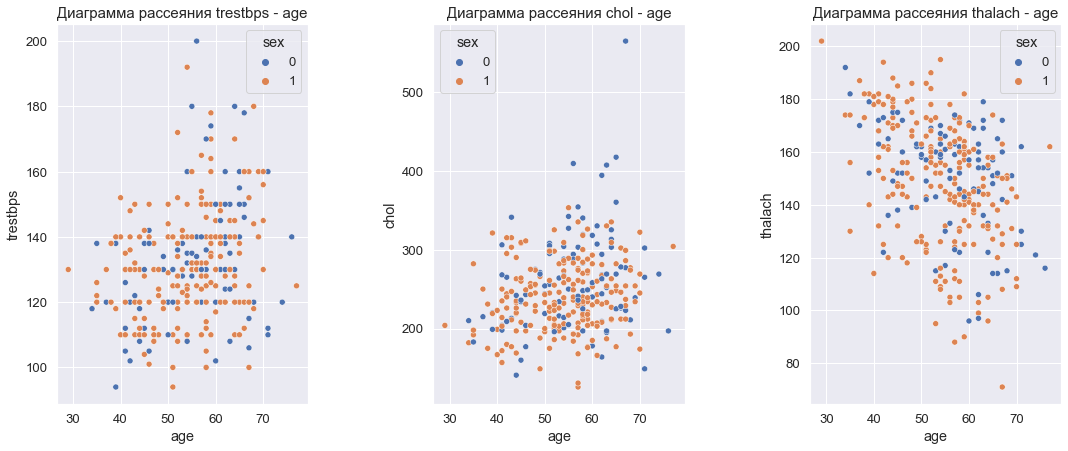

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

sns.scatterplot(data = heart, hue ="sex", x = "age", y = "trestbps", ax=ax1)
ax1.set_title("Диаграмма рассеяния trestbps - age", fontsize = 15)

sns.scatterplot(data = heart, hue ="sex", x = "age", y = "chol", ax=ax2)
ax2.set_title("Диаграмма рассеяния chol - age", fontsize = 15)

sns.scatterplot(data = heart, hue ="sex", x = "age", y = "thalach", ax=ax3)
ax3.set_title("Диаграмма рассеяния thalach - age", fontsize = 15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()


Просматривается положительная корреляция переменной 'trestbps' с возрастом, а так же отрицательная корреляция переменной 'thalach' с возрастом. По переменной 'chol' кажется, что корреляция отсутствует, но если заострить внимание на маркерах принадлежащих женщинам, можно предположить положительную корреляцию данного параметра с возрастом. 

In [47]:
corr_ATr, p_ATr = scist.spearmanr(heart["age"],heart["trestbps"])
corr_ACh, p_ACh = scist.spearmanr(heart["age"],heart["chol"])
corr_ATh, p_ATh = scist.spearmanr(heart["age"],heart["thalach"])


_ , p_mal = scist.spearmanr(heart[heart["sex"] == 1]["age"],heart[heart["sex"] == 1]["chol"])
_ , p_fem = scist.spearmanr(heart[heart["sex"] == 0]["age"],heart[heart["sex"] == 0]["chol"])

print(f"p-value корреляции'trestbps' и 'age' = {p_ATr};\np-value корреляции'chol' и 'age' = {p_ACh};\np-value корреляции'thalach' и 'age' = {p_ATh};\np-value корреляции'chol' и 'age' у мужчин = {p_mal};\np-value корреляции'chol' и 'age' у женщин = {p_fem}.")

p-value корреляции'trestbps' и 'age' = 4.2617094650124673e-07;
p-value корреляции'chol' и 'age' = 0.0006099143222853829;
p-value корреляции'thalach' и 'age' = 6.024320734620579e-13;
p-value корреляции'chol' и 'age' у мужчин = 0.027245210317591768;
p-value корреляции'chol' и 'age' у женщин = 0.02338964045733995.


**Выводы:** все полученные p-value меньше уровня значимости 0.05, следовательно, нулевая гипотеза (что корреляционная зависимость отсутсвует) отвергается, а значит корреляция для всех трех параметров с возрастом присутствует. Наблюдаем, что p-value параметра 'chol' у мужчин и женщин по отдельности близок к значению уровня значимости, при этом у женщин он чуть ниже. Возможно поэтому корелляция у женщин просматривалась на диаграмме лучше. 

### Задание 2.

Проверьте признаки age, trestbps, chol, thalach, oldpeak на нормальность с помощью критерия Шапиро-Уилка.

Для проверки гипотез используйте уровень значимости 0.05. 

In [51]:

def shapiro_test(val, a):
    _ , pval = scist.shapiro(val)
    if pval > a:
        res = "Выборка подчиняется нормальному распределению"
    else:
        res = "Выборка не подчиняется нормальному распределению"
    return res, pval

alpha = 0.05
age, p_ag = shapiro_test(heart["age"], alpha)
trestbps, p_tr = shapiro_test(heart["trestbps"], alpha)
chol, p_ch = shapiro_test(heart["chol"], alpha)
thalach, p_th = shapiro_test(heart["thalach"], alpha)
oldpeak, p_ol = shapiro_test(heart["oldpeak"], alpha)

print(f"{age} по признаку 'age', так как p-value = {p_ag}.\n{trestbps} по признаку 'trestbps', так как p-value = {p_tr}.\n{chol} по признаку 'chol' , так как p-value = {p_ch};\n{thalach} по признаку 'thalach', так как p-value = {p_th}.\n{oldpeak} по признаку 'oldpeak', так как p-value = {p_ol}.")

Выборка не подчиняется нормальному распределению по признаку 'age', так как p-value = 0.005801409482955933.
Выборка не подчиняется нормальному распределению по признаку 'trestbps', так как p-value = 1.4580031120203785e-06.
Выборка не подчиняется нормальному распределению по признаку 'chol' , так как p-value = 5.364669153351542e-09;
Выборка не подчиняется нормальному распределению по признаку 'thalach', так как p-value = 6.620329077122733e-05.
Выборка не подчиняется нормальному распределению по признаку 'oldpeak', так как p-value = 8.18340235561653e-17.


**Выводы:** выборки по всем признакам распределены ненормально, так как все полученные p-value меньше уровня значимоcти, следовательно, нулевая гипотеза (что выборка подчиняется нормальному распределению) отвергается и принимается альтернативная гипотеза (что выборка не подчиняется нормальному распределению). 

### Задание 3.

Проверьте гипотезу о равенстве средних значений в двух заданных независимых выборках a и b. Для проверки гипотезы используйте уровень значимости 0.05. Выясните, можно ли в каждом случае использовать для этой цели t-критерий Стьюдента. Если нет, то почему и какие критерии можно использовать вместо этого?

Рассмотрите случаи различных вариантов задания альтернативной гипотезы.

In [87]:
# Случай 1

def stat_val(a, b, alpha):#n = 1,2,3 ввела, чтобы понять по какой из ветвей пошел счет
    _ , anorm = scist.shapiro(a)#проверяем обе выборки на нормальность
    _ , bnorm = scist.shapiro(b)
    if anorm >= alpha and bnorm >= alpha:#обе выборки распределены нормально: p-value = 0.4408877491950989, p-value = 0.07131984829902649
        _ , p_bar = scist.bartlett(a, b)#проверка равенствa диспепрсий двух выборок
        if p_bar >= alpha:#дисперсии равны: p-value = 0.21960989363311992
            n = 1 
            _ , pval1 = scist.ttest_ind(a, b) #смотрим отличаются ли средние значения выборок
            if pval1 < alpha:#отличия есть: p-value = 0.03032409781412991
                _ , pval2 = scist.ttest_ind(a, b, alternative = "less")#p-value = 0.015162048907064955
                _ , pval3 = scist.ttest_ind(a, b, alternative = "greater")#p-value = 0.984837951092935
                return pval1, pval2, pval3, n
            else:
                return pval1, n
        else:
            n = 2
            _ , pval1 = scist.ttest_ind(a, b, equal_var = False)
            if pval1 < alpha:
                _ , pval2 = scist.ttest_ind(a, b, equal_var = False, alternative = "less")
                _ , pval3 = scist.ttest_ind(a, b, equal_var = False, alternative = "greater")
                return pval1, pval2, pval3, n
            else:
                return pval1, n
    else:
        n = 3
        _ , pval1 = scist.mannwhitneyu(a, b)
        if pval1 < alpha:
            _ , pval2 = scist.mannwhitneyu(a, b, alternative = "less")
            _ , pval3 = scist.mannwhitneyu(a, b, alternative = "greater")
            return pval1, pval2, pval3, n
        else:
            return pval1, n
    
a = [11.9, -0.3, 1.7, 3.0, 4.2, 1.5, -4.9, 8.3, 3.5, 0.2, 0.5, -4.8, -2.1, -0.8, 2.8]
b = [9.1, 10.8, -1.1, 11.1, 9.7, 13.5, 4.9, 0.9, 9.5, 7.3, -5.1, 11.7, -3.7, 0.9, 12.5]

print(*stat_val(a, b, alpha), sep = ", ")

0.03032409781412991, 0.015162048907064955, 0.984837951092935, 1


**Выводы:** наблюдаем по критерию Шапиро-Уилка, что обе выборки распределены нормально; по критерию Бартлетта, что дисперсии равны; затем по t-критерию Стьюдента для двух независимых выборок сравниваем средние значения, отличие между ними присутствует; вводим альтернативную гипотезу, отмечаем, что по односторонней альтернативе (less) среднее значение выборки 'a' меньше среднего значения выборки 'b'.

In [89]:
# Случай 2

def stat_val(a, b, alpha):#n = 1,2,3 ввела, чтобы понять по какой из ветвей пошел счет
    _ , anorm = scist.shapiro(a)#проверяем обе выборки на нормальность
    _ , bnorm = scist.shapiro(b)
    if anorm >= alpha and bnorm >= alpha:#обе выборки распределены НЕнормально: p-value = 0.01098500657826662, p-value = 0.002567312214523554, идем по else
        _ , p_bar = scist.bartlett(a, b)
        if p_bar >= alpha:
            n = 1
            _ , pval1 = scist.ttest_ind(a, b)
            if pval1 < alpha:
                _ , pval2 = scist.ttest_ind(a, b, alternative = "less")
                _ , pval3 = scist.ttest_ind(a, b, alternative = "greater")
                return pval1, pval2, pval3, n
            else:
                return pval1, n
        else:
            n = 2
            _ , pval1 = scist.ttest_ind(a, b, equal_var = False)
            if pval1 < alpha:
                _ , pval2 = scist.ttest_ind(a, b, equal_var = False, alternative = "less")
                _ , pval3 = scist.ttest_ind(a, b, equal_var = False, alternative = "greater")
                return pval1, pval2, pval3, n
            else:
                return pval1, n
    else:
        n = 3
        _ , pval1 = scist.mannwhitneyu(a, b)#смотрим отличаются ли средние значения выборок
        if pval1 < alpha:#отличий нет: p-value = 0.344633960624313, идем по else
            _ , pval2 = scist.mannwhitneyu(a, b, alternative = "less")
            _ , pval3 = scist.mannwhitneyu(a, b, alternative = "greater")
            return pval1, pval2, pval3, n
        else:
            return pval1, n

a = [14.8, 36.2, 57.1, 15.4, 48.0, 45.8, 59.7, 49.2, 15.0, 6.6, 2.2, 5.0, 0.4, 15.9, 25.0, 28.4, 55.7, 5.7, 5.0, 20.0, 34.7, 24.1, 27.5, 19.3, 27.6, 28.6, 27.0, 49.7, 46.0, 9.3, 59.8, 25.9, 53.6, 23.0, 23.0, 25.8, 3.8, 28.7, 42.7, 47.6, 29.3, 22.5, 27.2, 25.2, 0.5, 4.2, 50.6, 58.9, 57.5, 25.5]
b = [15.1, 18.4, 58.7, 10.0, 57.5, 7.2, 23.5, 49.1, 53.9, 31.3, 29.1, 20.0, 50.0, 50.4, 57.7, 49.5, 53.3, 4.9, 56.3, 17.6, 24.9, 10.8, 51.8, 18.0, 18.1, 32.3, 12.5, 9.6, 58.4, 48.2, 26.5, 10.0, 35.1, 2.9, 40.3, 10.9, 2.5, 28.8, 27.8, 0.8, 11.7, 47.4, 31.4, 2.2, 11.4, 56.4, 41.0, 52.8, 29.2, 38.2]
 
print(*stat_val(a, b, alpha), sep = ", ")

0.344633960624313, 3


**Выводы:** наблюдаем по критерию Шапиро-Уилка, что обе выборки распределены ненормально, это означает, что t-критерий Стьюдента использовать нельзя, так как нормальность - это одно из условий приминения критерия; используем его непараметрический эквивалент для проверки гипотезы о равенстве двух средних - критерий Манна-Уитни; полученное значение оказалось больше уровня значимости, следовательно, принимается нулевая гипотеза (что средние двух выборок равны). 

In [92]:
# Случай 3

def stat_val(a, b, alpha):#n = 1,2,3 ввела, чтобы понять по какой из ветвей пошел счет
    _ , anorm = scist.shapiro(a)#проверяем обе выборки на нормальность
    _ , bnorm = scist.shapiro(b)
    if anorm >= alpha and bnorm >= alpha:#обе выборки распределены нормально: p-value = 0.8452600240707397, p-value = 0.4738355576992035
        _ , p_bar = scist.bartlett(a, b)#проверка равенствa диспепрсий двух выборок
        if p_bar >= alpha:#дисперсии НЕравны: p-value = 0.0004000637251463587, идем по else
            n = 1
            _ , pval1 = scist.ttest_ind(a, b)

            if pval1 < alpha:
                _ , pval2 = scist.ttest_ind(a, b, alternative = "less")
                _ , pval3 = scist.ttest_ind(a, b, alternative = "greater")
                return pval1, pval2, pval3, n
            else:
                return pval1, n
        else:
            n = 2
            _ , pval1 = scist.ttest_ind(a, b, equal_var = False)#смотрим отличаются ли средние значения выборок
            if pval1 < alpha:#отличия есть: p-value = 7.821162043044878e-05
                _ , pval2 = scist.ttest_ind(a, b, equal_var = False, alternative = "less")#p-value = 3.910581021522439e-05
                _ , pval3 = scist.ttest_ind(a, b, equal_var = False, alternative = "greater")#p-value = 0.9999608941897848
                return pval1, pval2, pval3, n
            else:
                return pval1, n
    else:
        n = 3
        _ , pval1 = scist.mannwhitneyu(a, b)
        if pval1 < alpha:
            _ , pval2 = scist.mannwhitneyu(a, b, alternative = "less")
            _ , pval3 = scist.mannwhitneyu(a, b, alternative = "greater")
            return pval1, pval2, pval3, n
        else:
            return pval1, n

a = [-1.8, -3.3, 10.2, -5.0, 11.4, -17.0, 4.9, 7.0, 19.5, 1.4, 2.6, 3.3, -19.6, -13.3, 9.2, 22.9, -2.5, -1.3, -14.3, -2.7, 10.0, 0.7, -9.2, 32.1, 6.3, 25.9, -2.9, -9.7, 10.2, 15.6]
b = [11.7, 25.3, 17.2, 3.6, 10.9, 16.7, 16.6, 20.3, 8.3, 22.0, 11.4, 15.5, 20.1, 10.2, 18.8, 10.4, 5.8, 6.4, 14.7, 15.4, 15.4, 26.5, 12.5, 26.9, 7.6, 6.4, 14.7, 15.1, 4.9, 13.9]

print(*stat_val(a, b, alpha), sep = ", ")

7.821162043044878e-05, 3.910581021522439e-05, 0.9999608941897848, 2


**Выводы:** наблюдаем по критерию Шапиро-Уилка, что обе выборки распределены нормально; по критерию Бартлетта, что дисперсии не равны друг другу, это означает, что мы не можем использовать t-критерий Стьюдента, так как одно из условий его использования - это равные дисперсии; но мы можем испоьзовать модификацию t-критерия Стьюдента - t-критерий Уэлча для двух независимых выборок; сравниваем средние значения, отличие между ними присутствует; вводим альтернативную гипотезу, отмечаем, что по односторонней альтернативе (less) среднее значение выборки 'a' меньше среднего значения выборки 'b'.

### Задание 4.

Загрузите из файла *health.txt* данные о физической активности и количестве простудных заболеваний.

Переменные:  
- initials - инициалы человека  
- active - уровень физической активности (0 - отсутствие физической активности; 1 - умеренная физическая активность; 2 - выраженная физическая активность  
- cold - количество перенесённых простудных заболеваний за прошедший год  

С помощью подходящего статистического теста определите, влияет ли физическая активность на иммунитет человека. Выбор статистического теста нужно обосновать. Для проверки гипотезы используйте уровень значимости 0.05.

In [112]:
health = pd.read_csv("health.txt", sep = ",")
#display(health)

alpha = 0.05
ofa = health[health["active"] == 0]["cold"]
ufa = health[health["active"] == 1]["cold"]
vfa = health[health["active"] == 2]["cold"]

#В данных выделилось три группы по активности. У нас выборки независимые. Для поиска зависимостей в эксперементальных данных, 
#где сравниваются три и более групп, используют ANOVA, либо критерий Краскела-Уоллеса (непараметрический аналог ANOVA). 
#В качестве условий использования ANOVA: нормальность распределения каждой выборки и равенство дисперсий между выборками.

#Нормальность проверяем по критерию Шапиро-Уилка:
_ , onorm = scist.shapiro(ofa)# p-value = 0.963670015335083
_ , unorm = scist.shapiro(ufa)# p-value = 0.9599782824516296
_ , vnorm = scist.shapiro(vfa)# p-value = 0.8200861215591431
#Все выборки распределены нормально (p-value > alpha, принимается нулевая гипотеза)

#Так как все выборки распределены нормально используем критерий Бартлетта для проверки равенства дисперсий попарно:
_ , p_ou = scist.bartlett(ofa, ufa)# p-value = 0.37334060711652206
_ , p_ov = scist.bartlett(ofa, vfa)# p-value = 0.13877049013586215
_ , p_uv = scist.bartlett(ufa, vfa)# p-value = 0.5269660373439744
#Дисперсии выборок равны (p-value > alpha, принимается нулевая гипотеза)

#Можно изпользовать ANOVA:
anova = scist.f_oneway(ofa, ufa, vfa)# p-value = 0.026721109954678204
#p-value < alpha, следовательно, уровень физической активности влияет на количество простудных заболеваний перенесенных за год

#Произодим апостериорные парные сравнения с коррекцией Бонферрони, чтобы снизить вероятность ошибки первого рода:
m = 3 #количество парных сравнений
print(f"alpha_corrected = {alpha/m}")

_ , cp_ou = scist.ttest_ind(ofa, ufa)# p-value = 0.23458491443862808
_ , cp_ov = scist.ttest_ind(ofa, vfa)# p-value = 0.016104779385118638
_ , cp_uv = scist.ttest_ind(ufa, vfa)# p-value = 0.06346652104918524
#Наблюдаем, что значимые различия присутствуют между группами с отсутствующей физической активностью и 
#выраженной физической активностью.

#Вводим альтернативную гипотезу:
_ , cp_ov1 = scist.ttest_ind(ofa, vfa, alternative = "less")# p-value = 0.9919476103074406
_ , cp_ov2 = scist.ttest_ind(ofa, vfa, alternative = "greater")# p-value = 0.008052389692559319

alpha_corrected = 0.016666666666666666


**Выводы:** было выявлено, что физическая активность влияет на имуннитет человека, так как имеются различия между выборкой с выраженной физической активностью и отсутствием физической активности; при этом отмечается, что среднее значение заболеваемости в выборке с выраженной физической активностью меньше, чем в выборке с отсутствующей физической активностью, исходя из апостериорных парных сравнений с введением альтернативной гипотезы. 